In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read csv file 
df=pd.read_csv('tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
291,1183,1,3,"Daly, Miss. Margaret Marcella Maggie""""",female,30.0,0,0,382650,6.95,NaN,Q
57,949,0,3,"Abelseth, Mr. Olaus Jorgensen",male,25.0,0,0,348122,7.65,F G63,S
267,1159,0,3,"Warren, Mr. Charles William",male,NaN,0,0,C.A. 49867,7.55,NaN,S
278,1170,0,2,"Ware, Mr. John James",male,30.0,1,0,CA 31352,21.00,NaN,S
397,1289,1,1,"Frolicher-Stehli, Mrs. Maxmillian (Margaretha ...",female,48.0,1,1,13567,79.20,B41,C


In [4]:
df.shape

(418, 12)

In [5]:
# data overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
# drop column cabin because about 78% data not available
df.drop(columns=['Cabin'],inplace=True)

In [7]:
# NUll values in age column 86 and fare column 1
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [8]:
# fill age column
df_age=np.random.randint(df['Age'].mean()-df['Age'].std(),df['Age'].mean()+df['Age'].std(),86)

In [9]:
df['Age'][df['Age'].isnull()]=df_age

C:\Users\DELL\AppData\Local\Temp\ipykernel_19596\1030105207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][df['Age'].isnull()]=df_age


In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.293062,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,13.176453,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,22.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

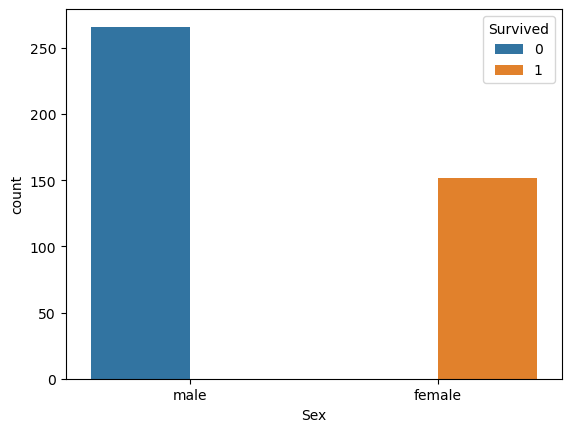

In [13]:
# male and female survived count visualization
sns.countplot(x=df['Sex'],hue=df['Survived'])

In [14]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Survived, dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

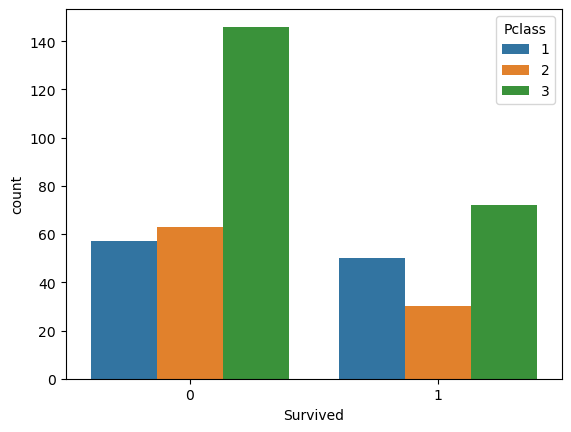

In [15]:
# survived and non survived visualization according to Pclass
sns.countplot(x=df['Survived'],hue=df['Pclass'])

In [16]:
df.groupby('Embarked')['Survived'].mean()

Embarked
C    0.392157
Q    0.521739
S    0.325926
Name: Survived, dtype: float64

C:\Users\DELL\AppData\Local\Temp\ipykernel_19596\1488268872.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'][df['Survived']==0])
C:\Users\DELL\AppData\Local\Temp\ipykernel_19596\1488268872.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'][df['Survived']==1])


<Axes: xlabel='Age', ylabel='Density'>

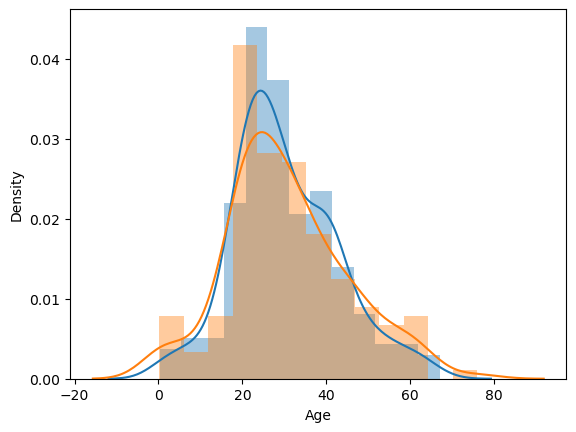

In [17]:
sns.distplot(df['Age'][df['Survived']==0])
sns.distplot(df['Age'][df['Survived']==1])

In [18]:
# encode the sex column
from sklearn.preprocessing import LabelEncoder
labelEncoder=LabelEncoder()

df['Sex']=labelEncoder.fit_transform(df['Sex'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S


In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [20]:
# store the passengerId's 
passengerid=df['PassengerId'].values

In [21]:
# drop columns that not required
df.drop(columns=['PassengerId','Name','SibSp','Parch','Ticket','Fare','Age','Embarked'],inplace=True)

In [22]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
dtype: int64

In [23]:
df.head()

,Survived,Pclass,Sex
0,0,3,1
1,1,3,0
2,0,2,1
3,0,3,1
4,1,3,0


In [24]:
x=df[['Pclass','Sex']]
y=df['Survived']

In [25]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
# model selection and train
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(random_state=0)
lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [27]:
y_pred=lr.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [28]:
y_test

360    0
170    0
224    1
358    0
309    1
      ..
100    1
7      0
22     1
68     0
328    0
Name: Survived, Length: 84, dtype: int64

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

1.0

In [30]:
df.shape

(418, 3)

In [31]:
xf=df.iloc[:,1:].values

In [32]:
y_final=lr.predict(xf)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [33]:
y_final.shape

(418,)

In [34]:
passengerid.shape

(418,)

In [35]:
final=pd.DataFrame()

In [37]:
final['Passengerid']=passengerid
final['Survived']=y_final

In [38]:
# final output
final

,Passengerid,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [39]:
final.to_csv('Task1_Codsoft',index=False)